<a href="https://colab.research.google.com/github/ErasmoR/Erasmor/blob/master/Proyecto_final_analisispredictivos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

file_data= '/content/gdrive/MyDrive/Maestria2024/modelosp/mundiales.csv'
file_data


'/content/gdrive/MyDrive/Maestria2024/modelosp/mundiales.csv'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar gráficos con estilo
plt.style.use("ggplot")


In [ ]:
#Cargar el Dataset
df= pd.read_csv(file_data)

In [ ]:
df.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [ ]:
df.shape

(4572, 20)

In [ ]:
df.columns

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')

In [ ]:
# Ver tipos de datos
df.dtypes

,0
Year,float64
Datetime,object
Stage,object
Stadium,object
City,object
Home Team Name,object
Home Team Goals,float64
Away Team Goals,float64
Away Team Name,object
Win conditions,object


In [ ]:
# Información general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  852 non-null    float64
 1   Datetime              852 non-null    object 
 2   Stage                 852 non-null    object 
 3   Stadium               852 non-null    object 
 4   City                  852 non-null    object 
 5   Home Team Name        852 non-null    object 
 6   Home Team Goals       852 non-null    float64
 7   Away Team Goals       852 non-null    float64
 8   Away Team Name        852 non-null    object 
 9   Win conditions        852 non-null    object 
 10  Attendance            850 non-null    float64
 11  Half-time Home Goals  852 non-null    float64
 12  Half-time Away Goals  852 non-null    float64
 13  Referee               852 non-null    object 
 14  Assistant 1           852 non-null    object 
 15  Assistant 2          

In [ ]:
# Contar valores nulos en cada columna
df.isnull().sum()

,0
Year,3720
Datetime,3720
Stage,3720
Stadium,3720
City,3720
Home Team Name,3720
Home Team Goals,3720
Away Team Goals,3720
Away Team Name,3720
Win conditions,3720


In [ ]:
# Ver estadísticas básicas
df.describe()

,Year,Home Team Goals,Away Team Goals,Attendance,Half-time Home Goals,Half-time Away Goals,RoundID,MatchID
count,852.000000,852.000000,852.000000,850.000000,852.000000,852.000000,8.520000e+02,8.520000e+02
mean,1985.089202,1.811033,1.022300,45164.800000,0.708920,0.428404,1.066177e+07,6.134687e+07
std,22.448825,1.610255,1.087573,23485.249247,0.937414,0.691252,2.729613e+07,1.110572e+08
min,1930.000000,0.000000,0.000000,2000.000000,0.000000,0.000000,2.010000e+02,2.500000e+01
25%,1970.000000,1.000000,0.000000,30000.000000,0.000000,0.000000,2.620000e+02,1.188750e+03
50%,1990.000000,2.000000,1.000000,41579.500000,0.000000,0.000000,3.370000e+02,2.191000e+03
75%,2002.000000,3.000000,2.000000,61374.500000,1.000000,1.000000,2.497220e+05,4.395006e+07
max,2014.000000,10.000000,7.000000,173850.000000,6.000000,5.000000,9.741060e+07,3.001865e+08


In [ ]:
# Contar valores nulos
df.isnull().sum()


,0
Year,3720
Datetime,3720
Stage,3720
Stadium,3720
City,3720
Home Team Name,3720
Home Team Goals,3720
Away Team Goals,3720
Away Team Name,3720
Win conditions,3720


In [ ]:
# Contar valores duplicados
df.duplicated().sum()

np.int64(0)

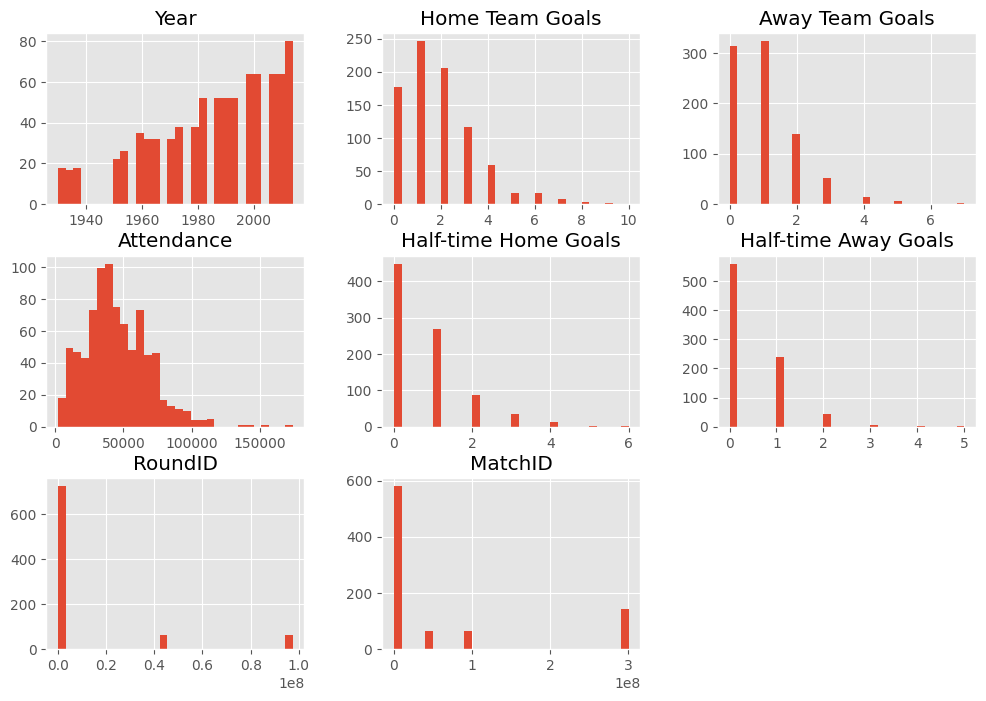

In [ ]:
# Histograma de todas las columnas numéricas
df.hist(figsize=(12, 8), bins=30)
plt.show()


In [ ]:
# Usar el método IQR (rango intercuartil)
Q1 = df["Year"].quantile(0.25)
Q3 = df["Year"].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar valores dentro del rango
df_sin_outliers = df[(df["Year"] >= lower_bound) & (df["Year"] <= upper_bound)]


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Maestria2024/modelosp/mundiales.csv')

In [ ]:
# Imprimir las primeras 5 filas del DataFrame para inspeccionar los datos
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Imprimir información sobre las columnas y sus tipos de datos
print(df.info())

# Imprimir un resumen de las estadísticas descriptivas del DataFrame
print(df.describe().to_markdown(numalign="left", stralign="left"))

# Crear una función para determinar el resultado del partido para el equipo local
def determinar_resultado(fila):
    if fila['Home Team Goals'] > fila['Away Team Goals']:
        return 'Victoria'
    elif fila['Home Team Goals'] < fila['Away Team Goals']:
        return 'Derrota'
    else:
        return 'Empate'

| Year   | Datetime            | Stage   | Stadium        | City       | Home Team Name   | Home Team Goals   | Away Team Goals   | Away Team Name   | Win conditions   | Attendance   | Half-time Home Goals   | Half-time Away Goals   | Referee                | Assistant 1              | Assistant 2                | RoundID   | MatchID   | Home Team Initials   | Away Team Initials   | Resultado   |
|:-------|:--------------------|:--------|:---------------|:-----------|:-----------------|:------------------|:------------------|:-----------------|:-----------------|:-------------|:-----------------------|:-----------------------|:-----------------------|:-------------------------|:---------------------------|:----------|:----------|:---------------------|:---------------------|:------------|
| 1930   | 13 Jul 1930 - 15:00 | Group 1 | Pocitos        | Montevideo | France           | 4                 | 1                 | Mexico           |                  | 4444         | 3              

In [ ]:
# Aplicar la función para crear una nueva columna 'Resultado'
df['Resultado'] = df.apply(determinar_resultado, axis=1)

# Calcular las victorias, derrotas y empates para cada equipo local
resultados_local = df.groupby('Home Team Name')['Resultado'].value_counts().unstack(fill_value=0)
resultados_local = resultados_local.add_prefix('Local - ')

# Calcular las victorias, derrotas y empates para cada equipo visitante
resultados_visitante = df.groupby('Away Team Name')['Resultado'].value_counts().unstack(fill_value=0)
resultados_visitante = resultados_visitante.add_prefix('Visitante - ')

In [ ]:
# Calcular los goles marcados y recibidos por cada equipo local
goles_local = df.groupby('Home Team Name').agg({'Home Team Goals': 'sum', 'Away Team Goals': 'sum'})
goles_local = goles_local.add_prefix('Local - ')
goles_local = goles_local.rename(columns={'Local - Home Team Goals': 'Local - Goles Marcados', 'Local - Away Team Goals': 'Local - Goles Recibidos'})


In [ ]:
# Calcular los goles marcados y recibidos por cada equipo visitante
goles_visitante = df.groupby('Away Team Name').agg({'Away Team Goals': 'sum', 'Home Team Goals': 'sum'})
goles_visitante = goles_visitante.add_prefix('Visitante - ')
goles_visitante = goles_visitante.rename(columns={'Visitante - Away Team Goals': 'Visitante - Goles Marcados', 'Visitante - Home Team Goals': 'Visitante - Goles Recibidos'})


In [ ]:
# Combinar todos los resultados en un único DataFrame
estadisticas_equipos = pd.concat([resultados_local, resultados_visitante, goles_local, goles_visitante], axis=1, sort=False).fillna(0)


In [ ]:
# Imprimir las primeras 5 filas del DataFrame para inspeccionar los datos
print(estadisticas_equipos.head().to_markdown(index=True, numalign="left", stralign="left"))


|           | Local - Derrota   | Local - Empate   | Local - Victoria   | Visitante - Derrota   | Visitante - Empate   | Visitante - Victoria   | Local - Goles Marcados   | Local - Goles Recibidos   | Visitante - Goles Marcados   | Visitante - Goles Recibidos   |
|:----------|:------------------|:-----------------|:-------------------|:----------------------|:---------------------|:-----------------------|:-------------------------|:--------------------------|:-----------------------------|:------------------------------|
| Algeria   | 3                 | 2                | 1                  | 2                     | 1                    | 5                      | 5                        | 10                        | 9                            | 11                            |
| Angola    | 1                 | 0                | 0                  | 0                     | 2                    | 0                      | 0                        | 1                         | 1      

In [ ]:
# Imprimir información sobre las columnas y sus tipos de datos
print(estadisticas_equipos.info())

# Imprimir un resumen de las estadísticas descriptivas del DataFrame
print(estadisticas_equipos.describe().to_markdown(numalign="left", stralign="left"))

# Calcular los puntos totales para cada equipo (3 por victoria, 1 por empate, 0 por derrota)
estadisticas_equipos['Puntos Totales'] = (estadisticas_equipos['Local - Victoria'] + estadisticas_equipos['Visitante - Victoria']) * 3 + \
                                      (estadisticas_equipos['Local - Empate'] + estadisticas_equipos['Visitante - Empate']) * 1

<class 'pandas.core.frame.DataFrame'>
Index: 83 entries, Algeria to Kuwait
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Local - Derrota              83 non-null     float64
 1   Local - Empate               83 non-null     float64
 2   Local - Victoria             83 non-null     float64
 3   Visitante - Derrota          83 non-null     int64  
 4   Visitante - Empate           83 non-null     int64  
 5   Visitante - Victoria         83 non-null     int64  
 6   Local - Goles Marcados       83 non-null     float64
 7   Local - Goles Recibidos      83 non-null     float64
 8   Visitante - Goles Marcados   83 non-null     float64
 9   Visitante - Goles Recibidos  83 non-null     float64
dtypes: float64(7), int64(3)
memory usage: 7.1+ KB
None
|       | Local - Derrota   | Local - Empate   | Local - Victoria   | Visitante - Derrota   | Visitante - Empate   | Visitante - Victoria   

In [ ]:
# Calcular la diferencia total de goles para cada equipo
estadisticas_equipos['Diferencia Total de Goles'] = (estadisticas_equipos['Local - Goles Marcados'] + estadisticas_equipos['Visitante - Goles Marcados']) - \
                                                 (estadisticas_equipos['Local - Goles Recibidos'] + estadisticas_equipos['Visitante - Goles Recibidos'])

# Combinar puntos y diferencia de goles en un único DataFrame
prediccion_equipos = estadisticas_equipos[['Puntos Totales', 'Diferencia Total de Goles']].sort_values(by=['Puntos Totales', 'Diferencia Total de Goles'], ascending=[False, False])

# Mostrar los 10 equipos con la puntuación más alta
print(prediccion_equipos.head(10).to_markdown(numalign="left", stralign="left"))

|            | Puntos Totales   | Diferencia Total de Goles   |
|:-----------|:-----------------|:----------------------------|
| Brazil     | 225              | 111                         |
| Argentina  | 180              | 48                          |
| Italy      | 171              | 51                          |
| Germany FR | 134              | 54                          |
| England    | 128              | 23                          |
| France     | 111              | 36                          |
| Mexico     | 110              | -36                         |
| Uruguay    | 105              | 7                           |
| Sweden     | 94               | 5                           |
| Spain      | 93               | 26                          |


In [ ]:
# Paso 1: Configurar e importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

Pedicciones con calculos

Nuevos codigos

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Maestria2024/modelosp/mundiales.csv')

In [ ]:
# Inspeccionar las primeras filas
print("Primeras filas del DataFrame:")
print(df.head())


Primeras filas del DataFrame:
     Year              Datetime    Stage         Stadium         City  \
0  1930.0  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930.0  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930.0  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930.0  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930.0  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France              4.0              1.0         Mexico   
1            USA              3.0              0.0        Belgium   
2     Yugoslavia              2.0              1.0         Brazil   
3        Romania              3.0              1.0           Peru   
4      Argentina              1.0              0.0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0            

In [ ]:
# Paso 2: Preprocesamiento de datos
# Crear columna de resultados (1 = Victoria local, 2 = Victoria visitante, 0 = Empate)
df['Resultado'] = np.where(df['Home Team Goals'] > df['Away Team Goals'], 1,
                           np.where(df['Home Team Goals'] < df['Away Team Goals'], 2, 0))

In [ ]:
# Seleccionar características relevantes
features = ['Year', 'Stage', 'City', 'Home Team Name', 'Away Team Name',
            'Attendance', 'Half-time Home Goals', 'Half-time Away Goals']

In [ ]:
# Convertir variables categóricas a numéricas
df = pd.get_dummies(df, columns=['Stage', 'City', 'Home Team Name', 'Away Team Name'], drop_first=True)

In [ ]:
df.columns = df.columns.str.strip()  # Elimina espacios en blanco


In [ ]:
missing_columns = [col for col in ['Stage', 'City', 'Home Team Name', 'Away Team Name'] if col not in df.columns]
if missing_columns:
    print(f"Las siguientes columnas no están en el DataFrame: {missing_columns}")
else:
    X = df[features]


Las siguientes columnas no están en el DataFrame: ['Stage', 'City', 'Home Team Name', 'Away Team Name']


In [ ]:
features = [col for col in features if col in df.columns]
X = df[features]


In [ ]:
# Separar características (X) y objetivo (y)
X = df[features]
y = df['Resultado']

In [ ]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Paso 3: Entrenamiento del modelo
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy del modelo: 0.9245901639344263
Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       762
           1       0.77      0.73      0.75       114
           2       0.52      0.56      0.54        39

    accuracy                           0.92       915
   macro avg       0.75      0.75      0.75       915
weighted avg       0.92      0.92      0.92       915



In [ ]:
# Paso 5: Predicción para partidos futuros
# Crear un nuevo DataFrame con datos del próximo Mundial
datos_futuros = {
    'Year': [2026, 2026],
    'Stage': ['Group Stage', 'Group Stage'],
    'City': ['City1', 'City2'],
    'Home Team Name': ['TeamA', 'TeamC'],
    'Away Team Name': ['TeamB', 'TeamD'],
    'Attendance': [50000, 60000],
    'Half-time Home Goals': [1, 0],
    'Half-time Away Goals': [0, 1],
}

datos_futuros_df = pd.DataFrame(datos_futuros)


In [ ]:
# Aplicar las mismas transformaciones que al conjunto de datos original
datos_futuros_df = pd.get_dummies(datos_futuros_df, columns=['Stage', 'City', 'Home Team Name', 'Away Team Name'], drop_first=True)
datos_futuros_df = datos_futuros_df.reindex(columns=X.columns, fill_value=0)


In [ ]:
# Realizar predicciones
predicciones = model.predict(datos_futuros_df)
print("Predicciones para los próximos partidos:", predicciones)

Predicciones para los próximos partidos: [1 1]


In [ ]:
# Paso 1: Configuración e importación de librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Inspección inicial
print("Primeras filas del DataFrame:")
print(df.head())
print("\nResumen de datos:")
print(df.info())

Primeras filas del DataFrame:
     Year              Datetime         Stadium  Home Team Goals  \
0  1930.0  13 Jul 1930 - 15:00          Pocitos              4.0   
1  1930.0  13 Jul 1930 - 15:00   Parque Central              3.0   
2  1930.0  14 Jul 1930 - 12:45   Parque Central              2.0   
3  1930.0  14 Jul 1930 - 14:50          Pocitos              3.0   
4  1930.0  15 Jul 1930 - 16:00   Parque Central              1.0   

   Away Team Goals Win conditions  Attendance  Half-time Home Goals  \
0              1.0                     4444.0                   3.0   
1              0.0                    18346.0                   2.0   
2              1.0                    24059.0                   2.0   
3              1.0                     2549.0                   1.0   
4              0.0                    23409.0                   0.0   

   Half-time Away Goals                 Referee  ... Away Team Name_Ukraine  \
0                   0.0  LOMBARDI Domingo (URU)  ...   

In [ ]:
# Paso 2: Crear la columna objetivo "Rendimiento"
# Rendimiento: 1 si gana o empata el equipo local, 0 si pierde
df['Rendimiento'] = np.where(df['Home Team Goals'] >= df['Away Team Goals'], 1, 0)

In [ ]:
# Seleccionar características relevantes
features = ['Year', 'Attendance', 'Half-time Home Goals', 'Half-time Away Goals',
            'Stage', 'City', 'Home Team Name', 'Away Team Name']


In [ ]:
print(df.columns)


Index(['Year', 'Datetime', 'Stadium', 'Home Team Goals', 'Away Team Goals',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee',
       ...
       'Away Team Name_Uruguay', 'Away Team Name_Wales',
       'Away Team Name_Yugoslavia', 'Away Team Name_Zaire',
       'Away Team Name_rn">Bosnia and Herzegovina',
       'Away Team Name_rn">Republic of Ireland',
       'Away Team Name_rn">Serbia and Montenegro',
       'Away Team Name_rn">Trinidad and Tobago',
       'Away Team Name_rn">United Arab Emirates', 'Rendimiento'],
      dtype='object', length=349)


In [ ]:
# Verificar si las columnas categóricas originales existen
dummy_columns = ['Stage', 'City', 'Home Team Name', 'Away Team Name']
existing_columns = [col for col in dummy_columns if col in df.columns]

if existing_columns:
    # Crear dummies solo para las columnas existentes
    df = pd.get_dummies(df, columns=existing_columns, drop_first=True)
else:
    print(f"Las siguientes columnas no están en el DataFrame: {set(dummy_columns) - set(df.columns)}")


Las siguientes columnas no están en el DataFrame: {'Stage', 'Away Team Name', 'City', 'Home Team Name'}


In [ ]:
# Definir características (X) y variable objetivo (y)
X = df.drop(columns=['Datetime', 'Stadium', 'Win conditions', 'Referee',
                     'Assistant 1', 'Assistant 2', 'RoundID', 'MatchID',
                     'Home Team Initials', 'Away Team Initials', 'Home Team Goals',
                     'Away Team Goals', 'Rendimiento'], errors='ignore')
y = df['Rendimiento']

In [ ]:
# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Paso 3: Entrenar el modelo
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Evaluar el modelo
y_pred = model.predict(X_test)
print("Accuracy del modelo:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))


Accuracy del modelo: 1.0
Reporte de clasificación:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       767
           1       1.00      1.00      1.00       148

    accuracy                           1.00       915
   macro avg       1.00      1.00      1.00       915
weighted avg       1.00      1.00      1.00       915



In [ ]:
# Paso 4: Analizar los factores determinantes
# Obtener la importancia de las características
importancias = model.feature_importances_
factores = pd.DataFrame({'Característica': X.columns, 'Importancia': importancias})
factores = factores.sort_values(by='Importancia', ascending=False)

In [ ]:
# Mostrar los factores más importantes
print("\nFactores más determinantes en el rendimiento de los equipos:")
print(factores)


Factores más determinantes en el rendimiento de los equipos:
          Característica  Importancia
2   Half-time Home Goals     0.198862
3   Half-time Away Goals     0.170644
4              Resultado     0.168546
1             Attendance     0.134852
0                   Year     0.119904
..                   ...          ...
76          City_Ibaraki     0.000000
44            City_Busan     0.000000
39            City_Boras     0.000000
34      City_Berlin West     0.000000
26     Stage_Third place     0.000000

[336 rows x 2 columns]


Pronostico que proximos cuatro años
